# Pymaceuticals Inc.
---

### Analysis

1- Mouse ID "g989" was found to have duplicate entries for the same timepoints as a result of the analysis. This may be a sign of poor data quality or data recording mistakes for this specific mouse.

2-For various drug regimens, a summary of tumor volume measurements is provided in the summary statistics table. The fact that some regimens had reduced mean and median tumor sizes is clear evidence of their potential efficacy in shrinking tumors. The standard error of the mean (SEM), which illustrates the range of the data, is additionally presented.

3- A reasonably high positive connection between mouse weight and average tumor volume was found in the scatter plot and linear regression analysis of mice receiving the Capomulin treatment. The average tumor volume in mice tends to rise along with their body weight. The r-squared value shows that in this dataset, mouse weight can account for about 70% of the variation in tumor volume, which is illustrated by the regression line.


In [539]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [540]:
# Checking the number of mice.
mouse_count = len(combined_data["Mouse ID"].unique())
mouse_count

249

In [541]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dublicated_id = combined_data.loc[combined_data.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dublicated_id

array(['g989'], dtype=object)

In [542]:
dublicated_data = combined_data.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name="count")
dublicated_id = dublicated_data[dublicated_data["count"]>1]["Mouse ID"].unique()
dublicated_id

array(['g989'], dtype=object)

In [543]:
# Optional: Get all the data for the duplicate mouse ID. 
dublicate_g989 = combined_data.loc[combined_data["Mouse ID"].isin(dublicated_id)==True]
dublicate_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [544]:
clean_df = combined_data[combined_data['Mouse ID'].isin(dublicated_id)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [545]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [546]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor,
                            "Median Tumor Volume":median_tumor,
                            "Tumor Volume Variance": variance_tumor,
                            "Tumor Volume Std. Dev.": std_tumor,
                            "Tumor Volume Std. Err.":sem_tumor})
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [547]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df =  clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

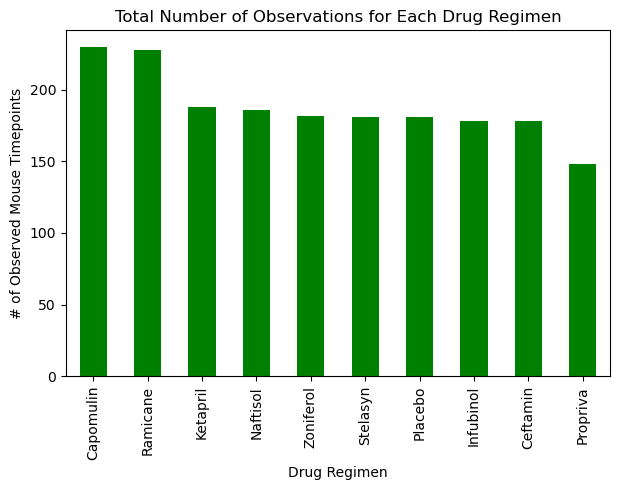

In [548]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = clean_df["Drug Regimen"].value_counts()
drug_count.plot(kind="bar", figsize=(6.3,5), color ="green")

plt.title("Total Number of Observations for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

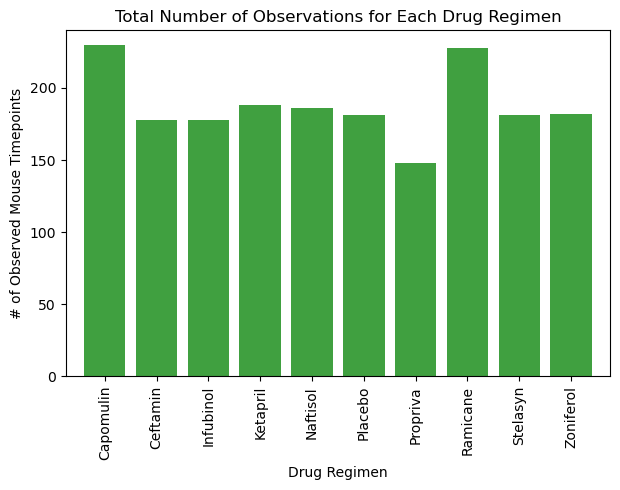

In [549]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count_py = clean_df.groupby("Drug Regimen")["Timepoint"].size()
x_axis = np.arange(len(drug_count_py))
tick_locations = [x for x in x_axis]
plt.figure(figsize=(6.3,5))
plt.bar(x_axis, drug_count_py, color='green', alpha=0.75, align="center")
plt.xticks(tick_locations, drug_count_py.index , rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_count_py)+10)
plt.title("Total Number of Observations for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

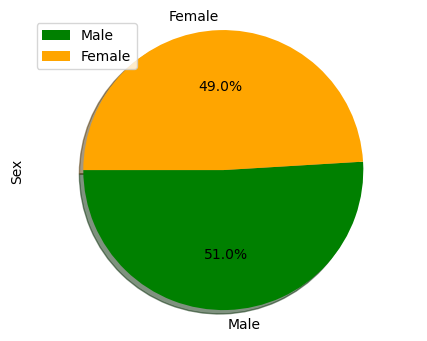

In [550]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df["Sex"].value_counts()
sex_pie = sex_count.plot(kind="pie", y= sex_count.index, colors=["green","orange"], figsize=(5,4),
                         autopct="%1.1f%%", shadow=True, startangle=180)
sex_pie.set_ylabel("Sex")
plt.axis("equal")
plt.legend(loc="best")
plt.show()

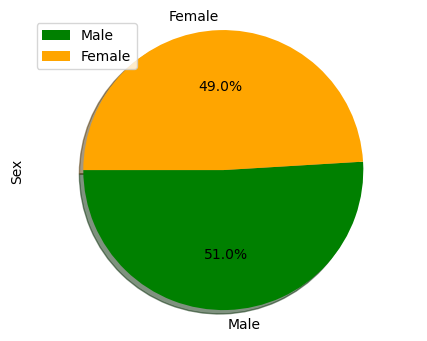

In [551]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_df["Sex"].value_counts()
plt.figure(figsize=(5, 4))
plt.pie(sex_count, explode=(0,0), labels=["Male","Female"], colors=["green","orange"],
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.ylabel("Sex")
plt.axis("equal")
plt.legend(loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [552]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_merged = pd.merge(max_timepoint, clean_df, on=["Mouse ID","Timepoint"], how="left")


In [553]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimen_list:
    regimen_data = treatment_merged.loc[treatment_merged["Drug Regimen"] == regimen]
    last_tumor_volume = regimen_data["Tumor Volume (mm3)"]
    quartiles = last_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq= quartiles[.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = regimen_data[(regimen_data["Tumor Volume (mm3)"] < lower_bound) |
                            (regimen_data["Tumor Volume (mm3)"] > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers['Tumor Volume (mm3)']}")

    tumor_vol_data.append(last_tumor_volume)


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


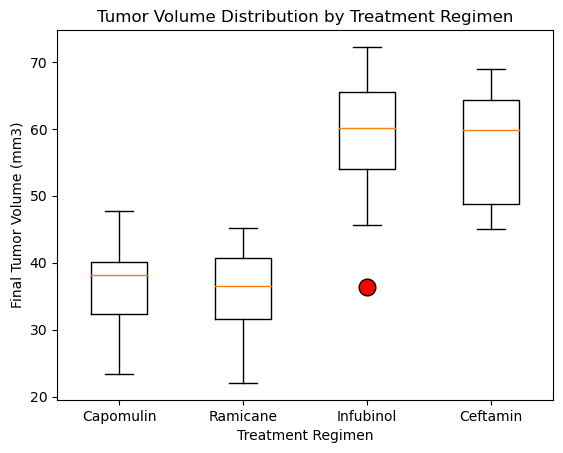

<Figure size 630x500 with 0 Axes>

In [554]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
plt.figure(figsize=(6.3, 5))
bp = ax.boxplot(tumor_vol_data, labels=regimen_list) 
plt.setp(bp["fliers"], marker="o", markersize=12, markerfacecolor="r", markeredgecolor="black", alpha=1)

ax.set_xlabel("Treatment Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_title("Tumor Volume Distribution by Treatment Regimen")
plt.show()

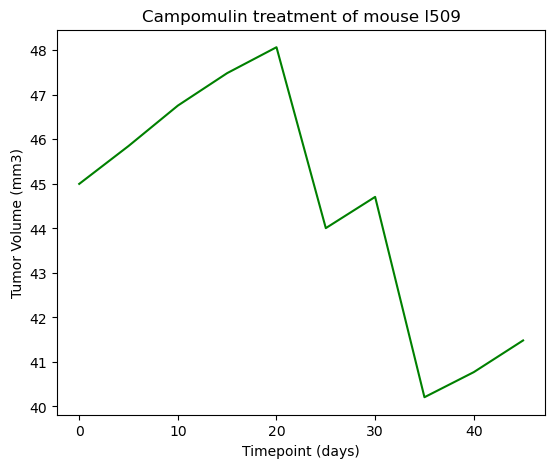

In [555]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
mouse_capomulin_data = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == mouse_id)]
plt.figure(figsize=(6.3,5))
plt.plot(mouse_capomulin_data["Timepoint"], mouse_capomulin_data["Tumor Volume (mm3)"], color= "green")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Campomulin treatment of mouse {mouse_id}")
plt.show()

## Line and Scatter Plots

C:\Users\mahsa\AppData\Local\Temp\ipykernel_29912\2684346795.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weight_tumor_data = capomulin_data.groupby("Mouse ID").mean()


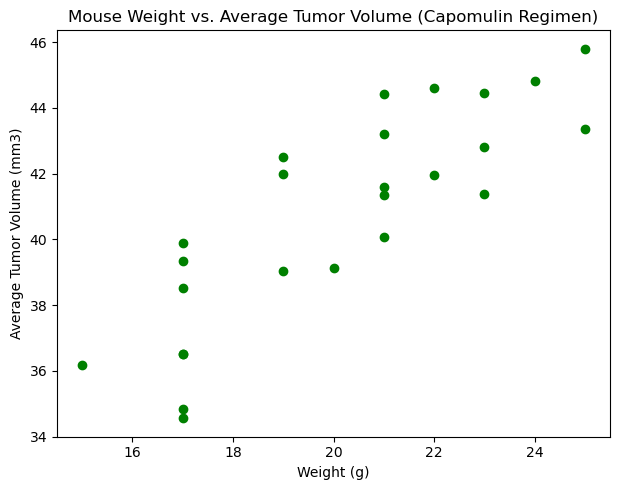

In [556]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
weight_tumor_data = capomulin_data.groupby("Mouse ID").mean()

plt.figure(figsize=(6.3,5))
plt.scatter(weight_tumor_data["Weight (g)"], weight_tumor_data["Tumor Volume (mm3)"], marker="o", facecolors= "green")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.tight_layout()
plt.show()

## Correlation and Regression

C:\Users\mahsa\AppData\Local\Temp\ipykernel_29912\68095473.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weight_tumor_data = capomulin_data.groupby("Mouse ID").mean()


The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.7088568047708723


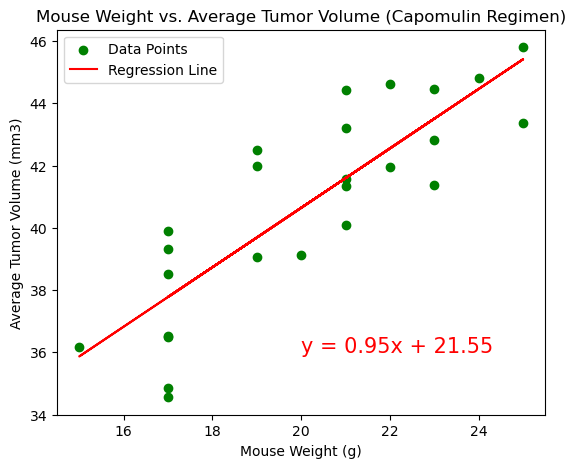

In [557]:
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
weight_tumor_data = capomulin_data.groupby("Mouse ID").mean()
weight = weight_tumor_data["Weight (g)"]
tumor_volume = weight_tumor_data["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.figure(figsize=(6.3,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = (weight * slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor_volume, label='Data Points', color="green")
plt.plot(weight, regress_values,"r-", label='Regression Line')
plt.annotate(line_eq, (20,36), fontsize=15, color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
print(f"The r-squared is: {rvalue**2}")
plt.legend(loc="best")
plt.show()
